In [3]:
# Load Traditional data
angular_df = pd.read_csv('angular.csv')
bootstrap_df = pd.read_csv('bootstrap.csv')
facebook_react_df = pd.read_csv('facebook_react.csv')
nodejs_df = pd.read_csv('nodejs.csv')

C:\Users\oguzhan\AppData\Local\Temp\ipykernel_4708\921093301.py:3: DtypeWarning: Columns (6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  bootstrap_df = pd.read_csv('bootstrap.csv')


In [3]:
angular_df.rename(columns={
    'case:concept:name': 'Case ID',
    'concept:name': 'Activity',
    'time:timestamp': 'Timestamp'
}, inplace=True)

In [4]:
bootstrap_df.rename(columns={
    'case:concept:name': 'Case ID',
    'concept:name': 'Activity',
    'time:timestamp': 'Timestamp'
}, inplace=True)

In [5]:
facebook_react_df.rename(columns={
    'case:concept:name': 'Case ID',
    'concept:name': 'Activity',
    'time:timestamp': 'Timestamp'
}, inplace=True)

In [6]:
nodejs_df.rename(columns={
    'case:concept:name': 'Case ID',
    'concept:name': 'Activity',
    'time:timestamp': 'Timestamp'
}, inplace=True)

In [7]:
# Load AI data
pytorch_df = pd.read_csv('pytorch.csv')
keras_df = pd.read_csv('keras.csv')
tensorflow_df = pd.read_csv('tensorflow.csv')
scikit_learn_df = pd.read_csv('scikit-learn.csv')

In [8]:
pytorch_df.rename(columns={
    'case:concept:name': 'Case ID',
    'concept:name': 'Activity',
    'time:timestamp': 'Timestamp'
}, inplace=True)

In [9]:
keras_df.rename(columns={
    'case:concept:name': 'Case ID',
    'concept:name': 'Activity',
    'time:timestamp': 'Timestamp'
}, inplace=True)

In [10]:
tensorflow_df.rename(columns={
    'case:concept:name': 'Case ID',
    'concept:name': 'Activity',
    'time:timestamp': 'Timestamp'
}, inplace=True)

In [11]:
scikit_learn_df.rename(columns={
    'case:concept:name': 'Case ID',
    'concept:name': 'Activity',
    'time:timestamp': 'Timestamp'
}, inplace=True)

In [12]:
# Add a category column to each dataframe
angular_df['category'] = 'Traditional'
bootstrap_df['category'] = 'Traditional'
facebook_react_df['category'] = 'Traditional'
nodejs_df['category'] = 'Traditional'

In [13]:
pytorch_df['category'] = 'AI-based'
keras_df['category'] = 'AI-based'
tensorflow_df['category'] = 'AI-based'
scikit_learn_df['category'] = 'AI-based'

In [14]:
# Merge all traditional and AI-based datasets
traditional_df = pd.concat([angular_df, bootstrap_df, facebook_react_df, nodejs_df], axis=0)
ai_based_df = pd.concat([pytorch_df, keras_df, tensorflow_df, scikit_learn_df], axis=0)

In [15]:
# Combine both into a single dataframe
combined_df = pd.concat([traditional_df, ai_based_df], axis=0)

In [16]:
# Group by category and calculate the mean and median time-to-close
workflow_efficiency = combined_df.groupby('category')['time_to_close'].agg(['mean', 'median']).reset_index()
print(workflow_efficiency)

      category       mean  median
0     AI-based  55.042155     2.0
1  Traditional  43.632757     2.0


In [54]:
import pandas as pd

# Convert 'Timestamp' column to datetime
combined_df['Timestamp'] = pd.to_datetime(combined_clean_df['Timestamp'])

# Filter rows with 'PR Created' and 'PR Closed' activities
created_PR_df = combined_df[combined_clean_df['Activity'] == 'PR Created']
closed_PR_df = combined_df[combined_clean_df['Activity'] == 'PR Closed']

# Merge to bring together 'Issue Created' and 'Issue Closed' timestamps for each 'Case ID'
pr_time_df = pd.merge(created_PR_df[['Case ID', 'Timestamp']], 
                         closed_PR_df[['Case ID', 'Timestamp']], 
                         on='Case ID', suffixes=('_created', '_closed'))

# Calculate the time-to-close in days
pr_time_df['pr_time_to_close'] = (pr_time_df['Timestamp_closed'] - pr_time_df['Timestamp_created']).dt.days

# Display the result
print(pr_time_df[['Case ID', 'pr_time_to_close']])

          Case ID  pr_time_to_close
0       371525695                74
1       371545804                 8
2       371559499                 0
3       371617225               178
4       371619604                96
...           ...               ...
98411  2434457478                 0
98412  2434463301                 4
98413  2434648548                 4
98414  2440175937               363
98415  2440611729                -1

[98416 rows x 2 columns]


C:\Users\oguzhan\AppData\Local\Temp\ipykernel_11072\1221864537.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  created_PR_df = combined_df[combined_clean_df['Activity'] == 'PR Created']
C:\Users\oguzhan\AppData\Local\Temp\ipykernel_11072\1221864537.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  closed_PR_df = combined_df[combined_clean_df['Activity'] == 'PR Closed']


In [55]:
# Merge 'time_to_close' back to the original DataFrame
combined_df = pd.merge(combined_df, pr_time_df[['Case ID', 'pr_time_to_close']], on='Case ID', how='left')

In [56]:
# Group by category and calculate the mean and median time-to-close
workflow_efficiency_clean_pr = combined_df.groupby('category')['pr_time_to_close'].agg(['mean', 'median']).reset_index()
print(workflow_efficiency_clean_pr)

      category       mean  median
0     AI-based  36.677574     3.0
1  Traditional  40.425993     3.0


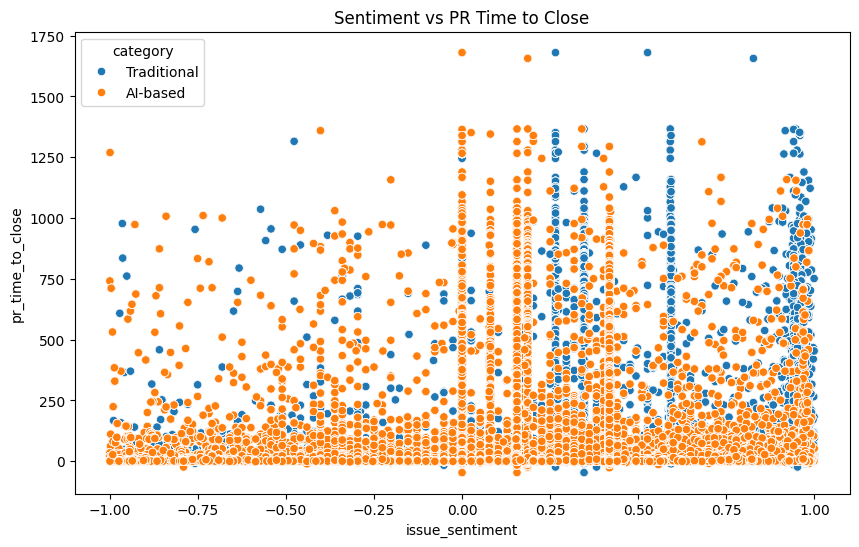

In [63]:
# Scatter plot sentiment vs time to close
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='issue_sentiment', y='pr_time_to_close', hue='category')
plt.title('Sentiment vs PR Time to Close')
plt.show()

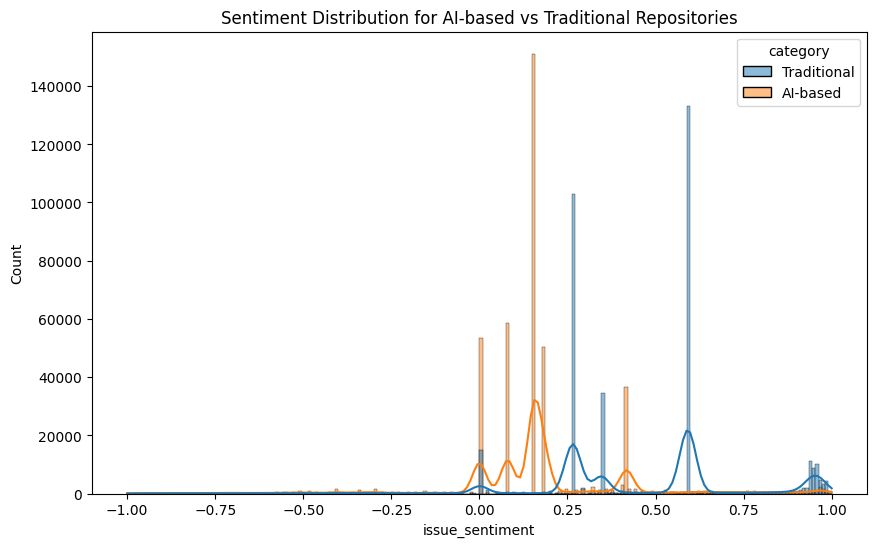

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment distribution for AI-based vs Traditional repositories
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x='issue_sentiment', hue='category', kde=True)
plt.title('Sentiment Distribution for AI-based vs Traditional Repositories')
plt.show()

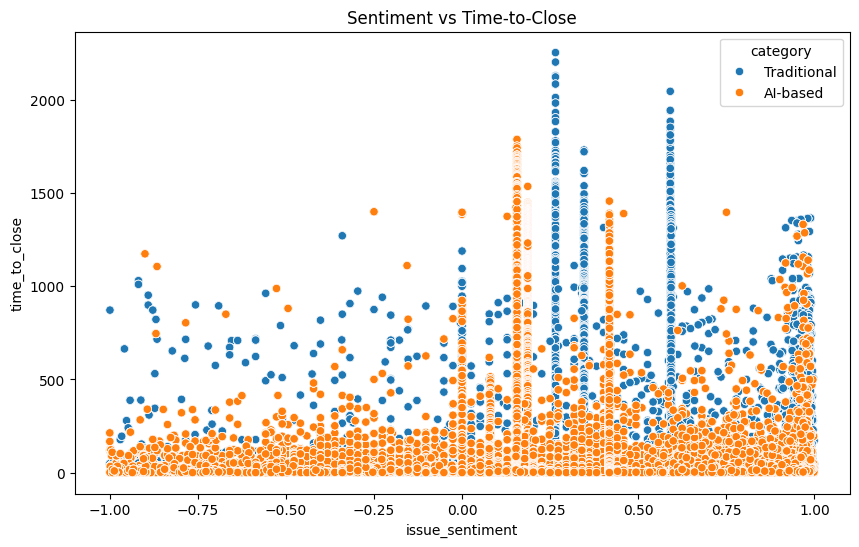

In [18]:
# Scatter plot sentiment vs time to close
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='issue_sentiment', y='time_to_close', hue='category')
plt.title('Sentiment vs Time-to-Close')
plt.show()

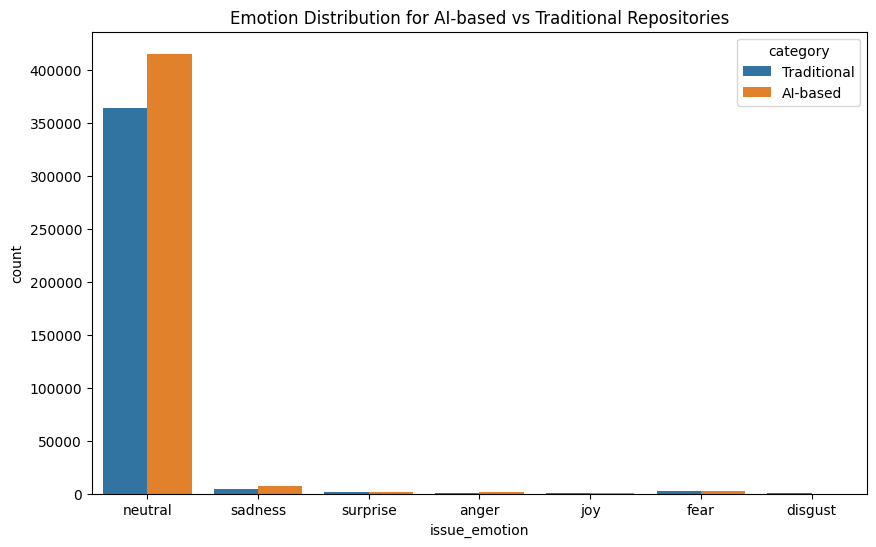

In [19]:
# Plot emotion distribution for AI-based vs Traditional repositories
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='issue_emotion', hue='category')
plt.title('Emotion Distribution for AI-based vs Traditional Repositories')
plt.show()

In [20]:
# Filter out rows where 'issue_emotion' is 'neutral'
angular_df_trim = angular_df[angular_df['issue_emotion'] != 'neutral']
bootstrap_df_trim = bootstrap_df[bootstrap_df['issue_emotion'] != 'neutral']
facebook_react_df_trim = facebook_react_df[facebook_react_df['issue_emotion'] != 'neutral']
nodejs_df_trim = nodejs_df[nodejs_df['issue_emotion'] != 'neutral']

In [21]:
# Filter out rows where 'issue_emotion' is 'neutral'
pytorch_df_trim = pytorch_df[pytorch_df['issue_emotion'] != 'neutral']
keras_df_trim = keras_df[keras_df['issue_emotion'] != 'neutral']
tensorflow_df_trim = tensorflow_df[tensorflow_df['issue_emotion'] != 'neutral']
scikit_learn_df_trim = scikit_learn_df[scikit_learn_df['issue_emotion'] != 'neutral']

In [22]:
# Merge all traditional and AI-based datasets
traditional_df_trim = pd.concat([angular_df_trim, bootstrap_df_trim, facebook_react_df_trim, nodejs_df_trim], axis=0)
ai_based_df_trim = pd.concat([pytorch_df_trim, keras_df_trim, tensorflow_df_trim, scikit_learn_df_trim], axis=0)

In [23]:
# Combine both into a single dataframe
combined_df_trim = pd.concat([traditional_df_trim, ai_based_df_trim], axis=0)

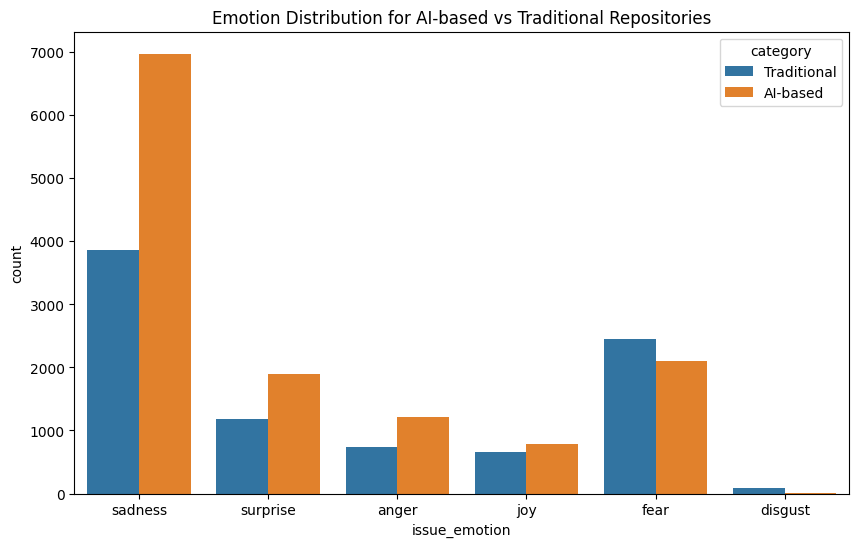

In [24]:
# Plot emotion distribution for AI-based vs Traditional repositories
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df_trim, x='issue_emotion', hue='category')
plt.title('Emotion Distribution for AI-based vs Traditional Repositories')
plt.show()

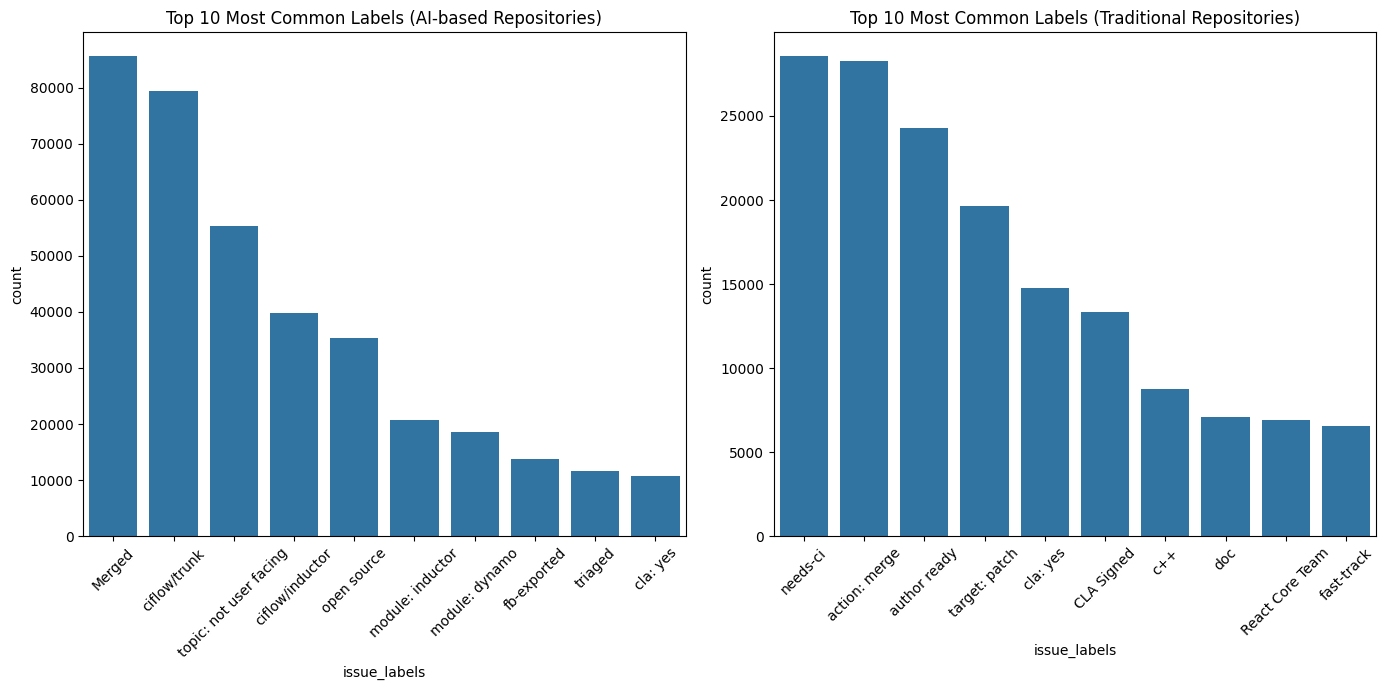

In [25]:
# Since issue_labels can have multiple labels per issue, split them into separate rows
combined_df['issue_labels'] = combined_df['issue_labels'].apply(lambda x: x.split(',') if pd.notnull(x) else [])

# Explode the labels into separate rows
labels_exploded_df = combined_df.explode('issue_labels')

# Count the occurrences of each label for AI-based and traditional categories
labels_distribution_by_category = labels_exploded_df.groupby(['category', 'issue_labels']).size().reset_index(name='count')

# Visualize the top 10 most common labels for each category (AI-based vs Traditional)
plt.figure(figsize=(14, 7))
top_labels_ai = labels_distribution_by_category[labels_distribution_by_category['category'] == 'AI-based'].nlargest(10, 'count')
top_labels_traditional = labels_distribution_by_category[labels_distribution_by_category['category'] == 'Traditional'].nlargest(10, 'count')

# Plot for AI-based
plt.subplot(1, 2, 1)
sns.barplot(x='issue_labels', y='count', data=top_labels_ai)
plt.title('Top 10 Most Common Labels (AI-based Repositories)')
plt.xticks(rotation=45)

# Plot for Traditional
plt.subplot(1, 2, 2)
sns.barplot(x='issue_labels', y='count', data=top_labels_traditional)
plt.title('Top 10 Most Common Labels (Traditional Repositories)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

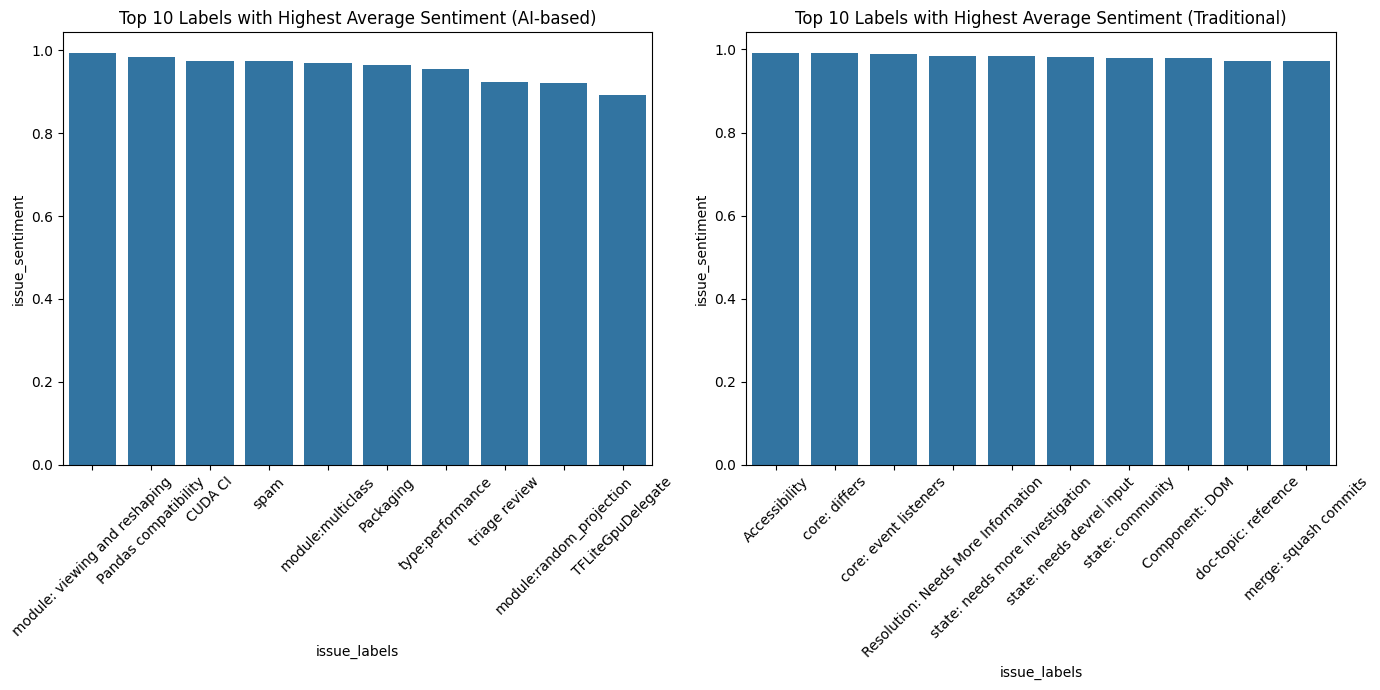

In [26]:
# Group by 'issue_labels' and 'category', and calculate the mean sentiment for each label
label_sentiment_by_category = labels_exploded_df.groupby(['category', 'issue_labels'])['issue_sentiment'].mean().reset_index()

# Visualize the sentiment scores for top 10 labels with highest average sentiment for both categories

plt.figure(figsize=(14, 7))

# Filter the top 10 labels with highest sentiment for AI-based
top_label_sentiment_ai = label_sentiment_by_category[label_sentiment_by_category['category'] == 'AI-based'].nlargest(10, 'issue_sentiment')

# Filter the top 10 labels with highest sentiment for Traditional
top_label_sentiment_traditional = label_sentiment_by_category[label_sentiment_by_category['category'] == 'Traditional'].nlargest(10, 'issue_sentiment')

# Plot for AI-based
plt.subplot(1, 2, 1)
sns.barplot(x='issue_labels', y='issue_sentiment', data=top_label_sentiment_ai)
plt.title('Top 10 Labels with Highest Average Sentiment (AI-based)')
plt.xticks(rotation=45)

# Plot for Traditional
plt.subplot(1, 2, 2)
sns.barplot(x='issue_labels', y='issue_sentiment', data=top_label_sentiment_traditional)
plt.title('Top 10 Labels with Highest Average Sentiment (Traditional)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

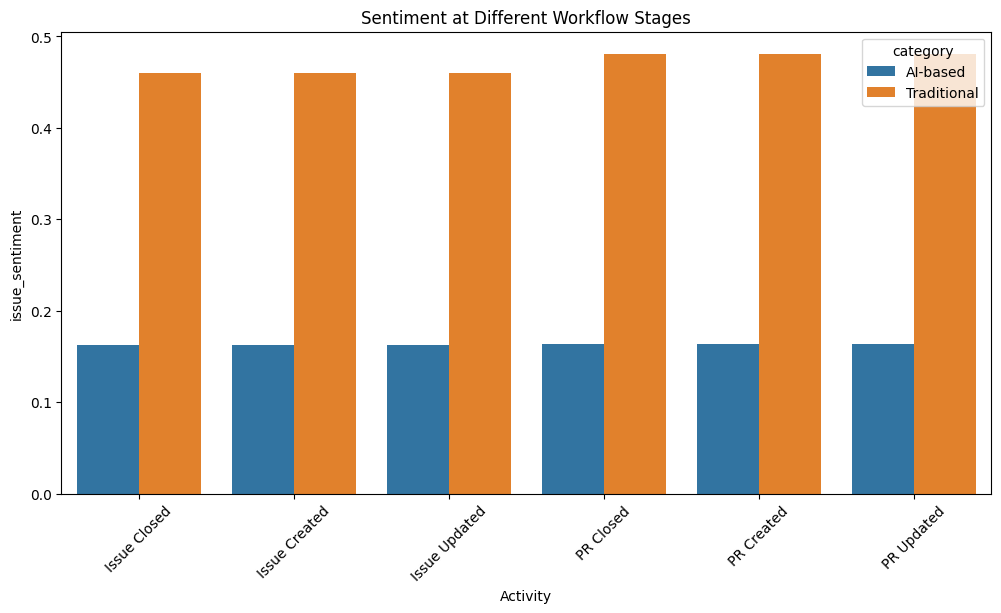

In [27]:
# Group by activity and category to analyze sentiment at different workflow stages
stage_analysis = combined_df.groupby(['Activity', 'category'])['issue_sentiment'].mean().reset_index()

# Visualize the sentiment across different workflow stages
plt.figure(figsize=(12, 6))
sns.barplot(data=stage_analysis, x='Activity', y='issue_sentiment', hue='category')
plt.title('Sentiment at Different Workflow Stages')
plt.xticks(rotation=45)
plt.show()

C:\Users\oguzhan\AppData\Local\Temp\ipykernel_11072\2355907864.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series_analysis = combined_df.resample('M', on='Timestamp')['issue_sentiment'].mean().reset_index()


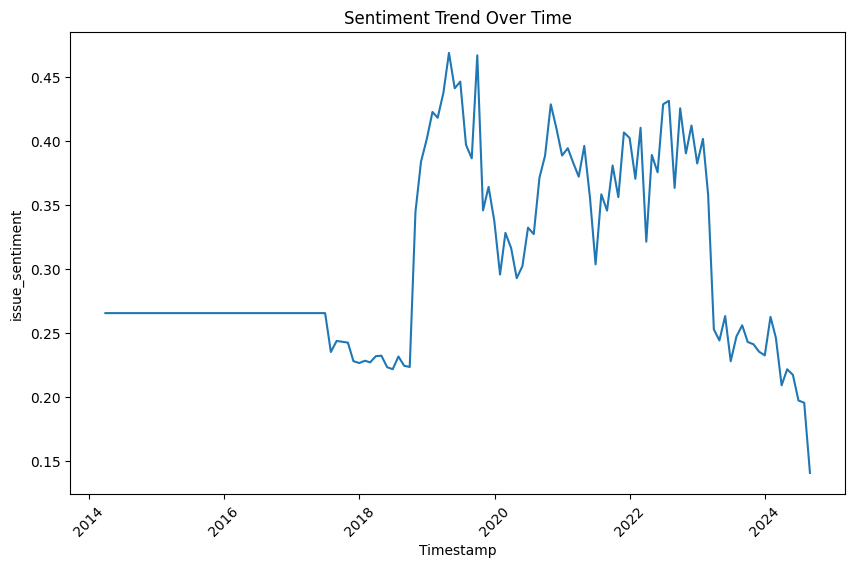

In [28]:
# Convert Timestamp to datetime if not already done
combined_df['Timestamp'] = pd.to_datetime(combined_df['Timestamp'])

# Group by time (monthly/weekly) and analyze sentiment trends over time
time_series_analysis = combined_df.resample('M', on='Timestamp')['issue_sentiment'].mean().reset_index()

# Plot time-series of sentiment
plt.figure(figsize=(10, 6))
sns.lineplot(data=time_series_analysis, x='Timestamp', y='issue_sentiment')
plt.title('Sentiment Trend Over Time')
plt.xticks(rotation=45)
plt.show()

In [29]:
# Load AI data
pytorch_clean_df = pd.read_csv('pytorch_clean.csv')
keras_clean_df = pd.read_csv('keras_clean.csv')
tensorflow_clean_df = pd.read_csv('tensorflow_clean.csv')
scikit_learn_clean_df = pd.read_csv('scikit-learn_clean.csv')

In [30]:
# Load Traditional data
angular_clean_df = pd.read_csv('angular_clean.csv')
bootstrap_clean_df = pd.read_csv('bootstrap_clean.csv')
facebook_react_clean_df = pd.read_csv('facebook_react_clean.csv')
nodejs_clean_df = pd.read_csv('nodejs_clean.csv')

In [31]:
# Add a category column to each dataframe
angular_clean_df['category'] = 'Traditional'
bootstrap_clean_df['category'] = 'Traditional'
facebook_react_clean_df['category'] = 'Traditional'
nodejs_clean_df['category'] = 'Traditional'

In [32]:
pytorch_clean_df['category'] = 'AI-based'
keras_clean_df['category'] = 'AI-based'
tensorflow_clean_df['category'] = 'AI-based'
scikit_learn_clean_df['category'] = 'AI-based'

In [33]:
# Merge all traditional and AI-based datasets
traditional_clean_df = pd.concat([angular_clean_df, bootstrap_clean_df, facebook_react_clean_df, nodejs_clean_df], axis=0)
ai_based_clean_df = pd.concat([pytorch_clean_df, keras_clean_df, tensorflow_clean_df, scikit_learn_clean_df], axis=0)

In [34]:
# Combine both into a single dataframe
combined_clean_df = pd.concat([traditional_clean_df, ai_based_clean_df], axis=0)

In [35]:
import pandas as pd

# Convert 'Timestamp' column to datetime
combined_clean_df['Timestamp'] = pd.to_datetime(combined_clean_df['Timestamp'])

# Filter rows with 'Issue Created' and 'Issue Closed' activities
created_df = combined_clean_df[combined_clean_df['Activity'] == 'Issue Created']
closed_df = combined_clean_df[combined_clean_df['Activity'] == 'Issue Closed']

# Merge to bring together 'Issue Created' and 'Issue Closed' timestamps for each 'Case ID'
issue_time_df = pd.merge(created_df[['Case ID', 'Timestamp']], 
                         closed_df[['Case ID', 'Timestamp']], 
                         on='Case ID', suffixes=('_created', '_closed'))

# Calculate the time-to-close in days
issue_time_df['time_to_close'] = (issue_time_df['Timestamp_closed'] - issue_time_df['Timestamp_created']).dt.days

# Display the result
print(issue_time_df[['Case ID', 'time_to_close']])

          Case ID  time_to_close
0       544340212            321
1       544465528             74
2       544661370             22
3       544692412              8
4       544711946            242
...           ...            ...
39315  2423391503              0
39316  2430123017              0
39317  2430790401              3
39318  2434457478              0
39319  2434648548              1

[39320 rows x 2 columns]


In [37]:
# Merge 'time_to_close' back to the original DataFrame
combined_clean_df = pd.merge(combined_clean_df, issue_time_df[['Case ID', 'time_to_close']], on='Case ID', how='left')

In [38]:
# Group by category and calculate the mean and median time-to-close
workflow_efficiency_clean = combined_clean_df.groupby('category')['time_to_close'].agg(['mean', 'median']).reset_index()
print(workflow_efficiency_clean)

      category       mean  median
0     AI-based  28.684792     3.0
1  Traditional  41.984123     4.0


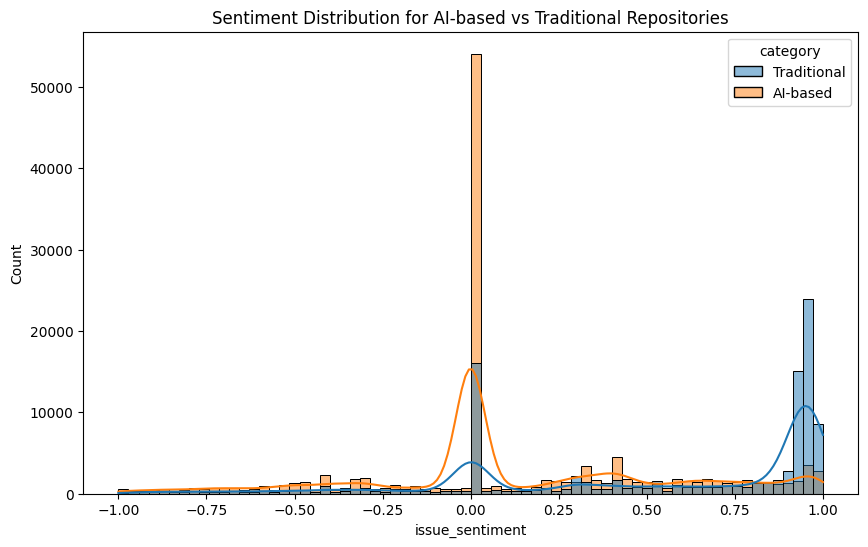

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment distribution for AI-based vs Traditional repositories
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_clean_df, x='issue_sentiment', hue='category', kde=True)
plt.title('Sentiment Distribution for AI-based vs Traditional Repositories')
plt.show()

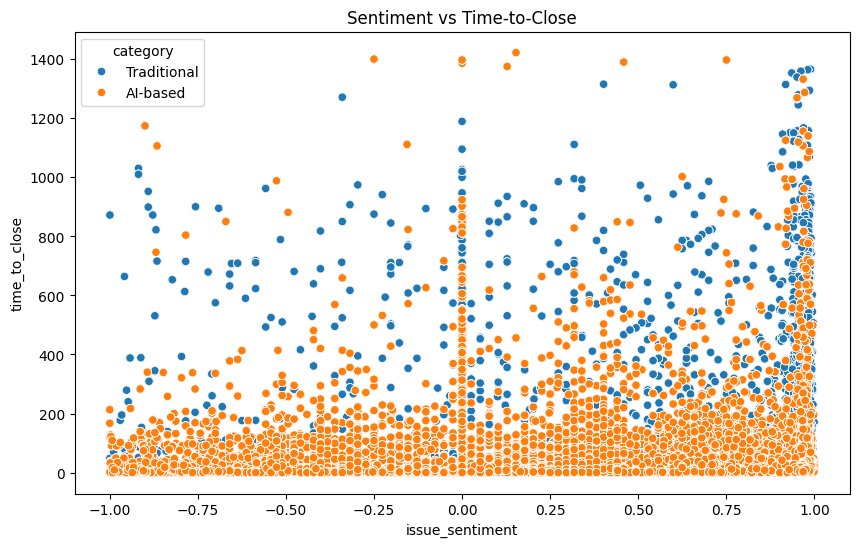

In [42]:
# Scatter plot sentiment vs time to close
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_clean_df, x='issue_sentiment', y='time_to_close', hue='category')
plt.title('Sentiment vs Time-to-Close')
plt.show()

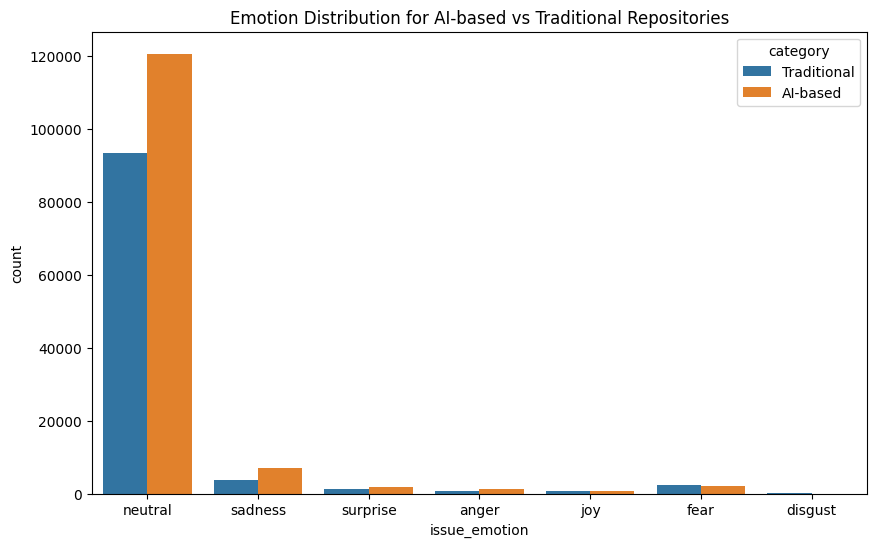

In [43]:
# Plot emotion distribution for AI-based vs Traditional repositories
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_clean_df, x='issue_emotion', hue='category')
plt.title('Emotion Distribution for AI-based vs Traditional Repositories')
plt.show()

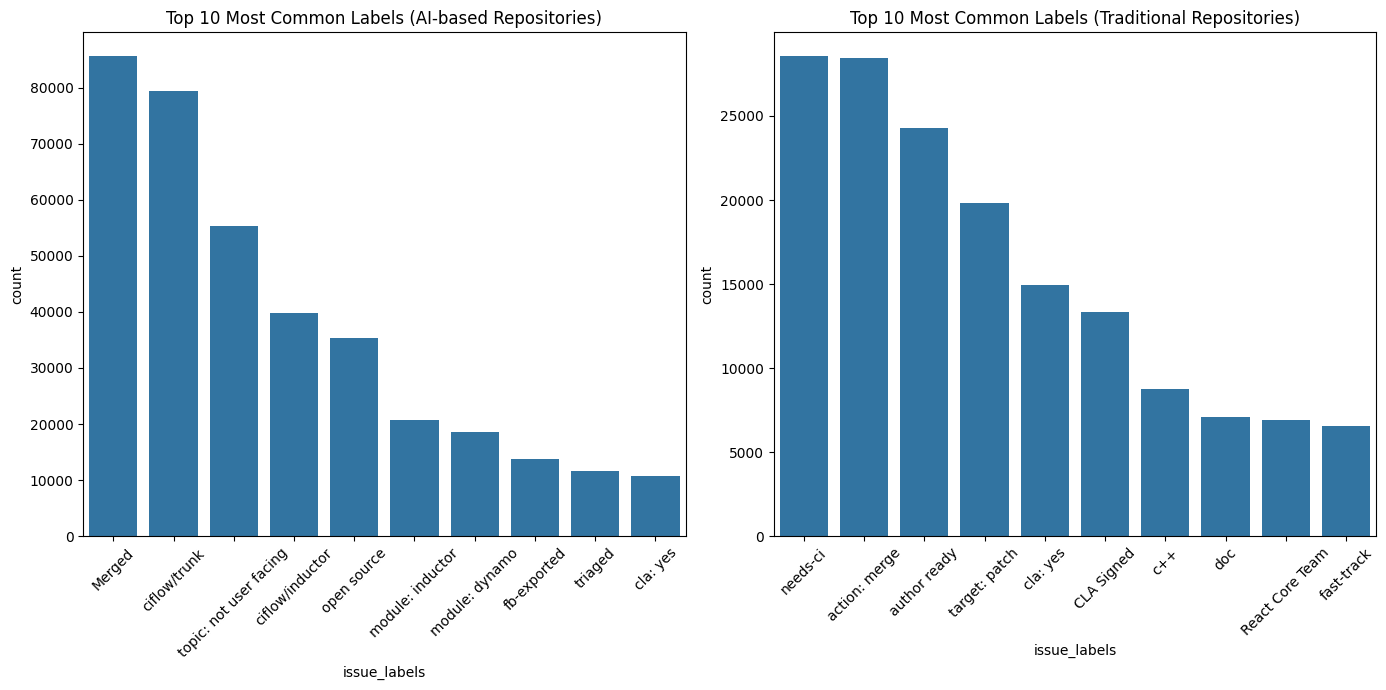

In [44]:
# Since issue_labels can have multiple labels per issue, split them into separate rows
combined_clean_df['issue_labels'] = combined_clean_df['issue_labels'].apply(lambda x: x.split(',') if pd.notnull(x) else [])

# Explode the labels into separate rows
labels_exploded_clean_df = combined_clean_df.explode('issue_labels')

# Count the occurrences of each label for AI-based and traditional categories
labels_distribution_by_clean_category = labels_exploded_clean_df.groupby(['category', 'issue_labels']).size().reset_index(name='count')

# Visualize the top 10 most common labels for each category (AI-based vs Traditional)
plt.figure(figsize=(14, 7))
top_labels_clean_ai = labels_distribution_by_clean_category[labels_distribution_by_clean_category['category'] == 'AI-based'].nlargest(10, 'count')
top_labels_clean_traditional = labels_distribution_by_clean_category[labels_distribution_by_clean_category['category'] == 'Traditional'].nlargest(10, 'count')

# Plot for AI-based
plt.subplot(1, 2, 1)
sns.barplot(x='issue_labels', y='count', data=top_labels_clean_ai)
plt.title('Top 10 Most Common Labels (AI-based Repositories)')
plt.xticks(rotation=45)

# Plot for Traditional
plt.subplot(1, 2, 2)
sns.barplot(x='issue_labels', y='count', data=top_labels_clean_traditional)
plt.title('Top 10 Most Common Labels (Traditional Repositories)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

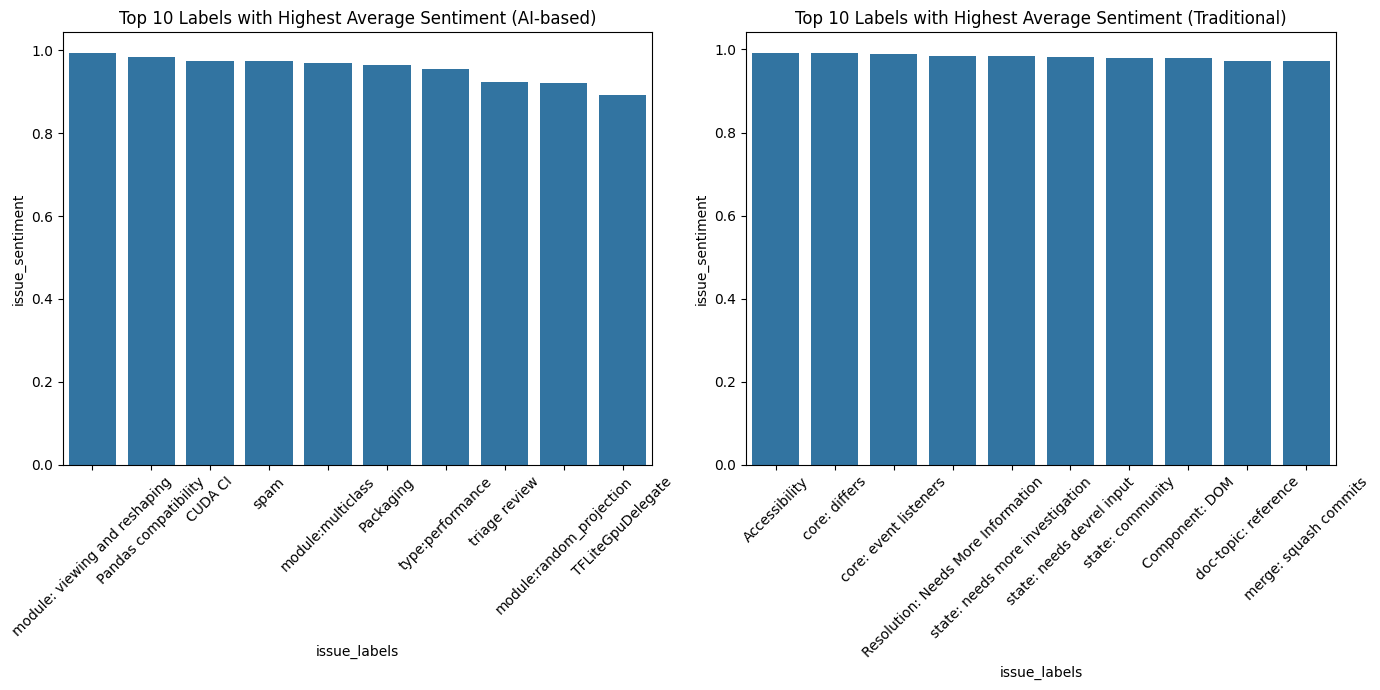

In [45]:
# Group by 'issue_labels' and 'category', and calculate the mean sentiment for each label
label_sentiment_by_category = labels_exploded_clean_df.groupby(['category', 'issue_labels'])['issue_sentiment'].mean().reset_index()

# Visualize the sentiment scores for top 10 labels with highest average sentiment for both categories

plt.figure(figsize=(14, 7))

# Filter the top 10 labels with highest sentiment for AI-based
top_label_sentiment_clean_ai = label_sentiment_by_category[label_sentiment_by_category['category'] == 'AI-based'].nlargest(10, 'issue_sentiment')

# Filter the top 10 labels with highest sentiment for Traditional
top_label_sentiment_clean_traditional = label_sentiment_by_category[label_sentiment_by_category['category'] == 'Traditional'].nlargest(10, 'issue_sentiment')

# Plot for AI-based
plt.subplot(1, 2, 1)
sns.barplot(x='issue_labels', y='issue_sentiment', data=top_label_sentiment_clean_ai)
plt.title('Top 10 Labels with Highest Average Sentiment (AI-based)')
plt.xticks(rotation=45)

# Plot for Traditional
plt.subplot(1, 2, 2)
sns.barplot(x='issue_labels', y='issue_sentiment', data=top_label_sentiment_clean_traditional)
plt.title('Top 10 Labels with Highest Average Sentiment (Traditional)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C:\Users\oguzhan\AppData\Local\Temp\ipykernel_11072\2343506433.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series_analysis = combined_clean_df.resample('M', on='Timestamp')['issue_sentiment'].mean().reset_index()


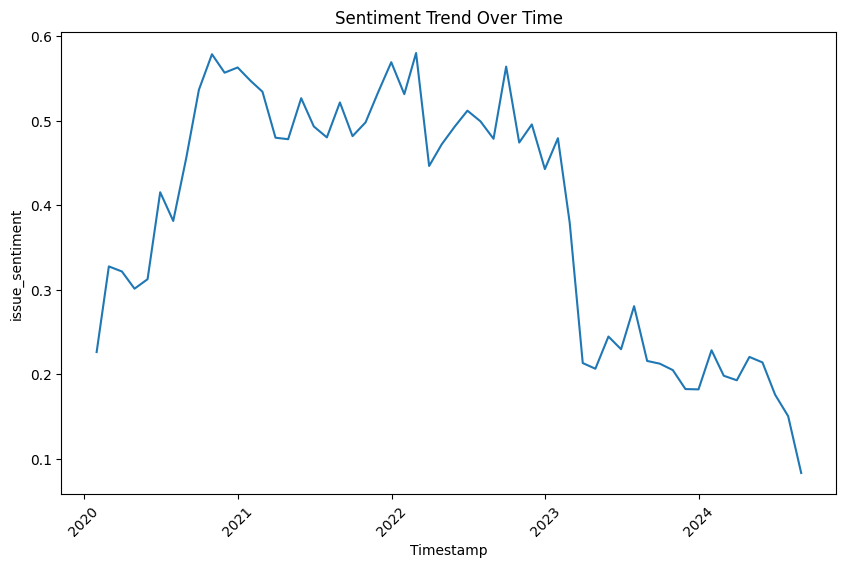

In [46]:
# Convert Timestamp to datetime if not already done
combined_clean_df['Timestamp'] = pd.to_datetime(combined_clean_df['Timestamp'])

# Group by time (monthly/weekly) and analyze sentiment trends over time
time_series_analysis = combined_clean_df.resample('M', on='Timestamp')['issue_sentiment'].mean().reset_index()

# Plot time-series of sentiment
plt.figure(figsize=(10, 6))
sns.lineplot(data=time_series_analysis, x='Timestamp', y='issue_sentiment')
plt.title('Sentiment Trend Over Time')
plt.xticks(rotation=45)
plt.show()

C:\Users\oguzhan\AppData\Local\Temp\ipykernel_11072\3354872117.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series_analysis = df_category.resample('M', on='Timestamp')['issue_sentiment'].mean().reset_index()


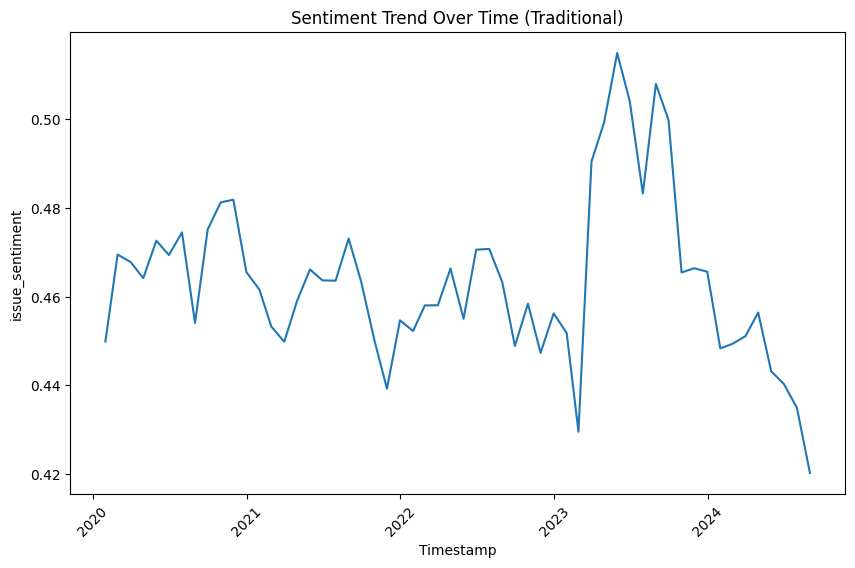

C:\Users\oguzhan\AppData\Local\Temp\ipykernel_11072\3354872117.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series_analysis = df_category.resample('M', on='Timestamp')['issue_sentiment'].mean().reset_index()


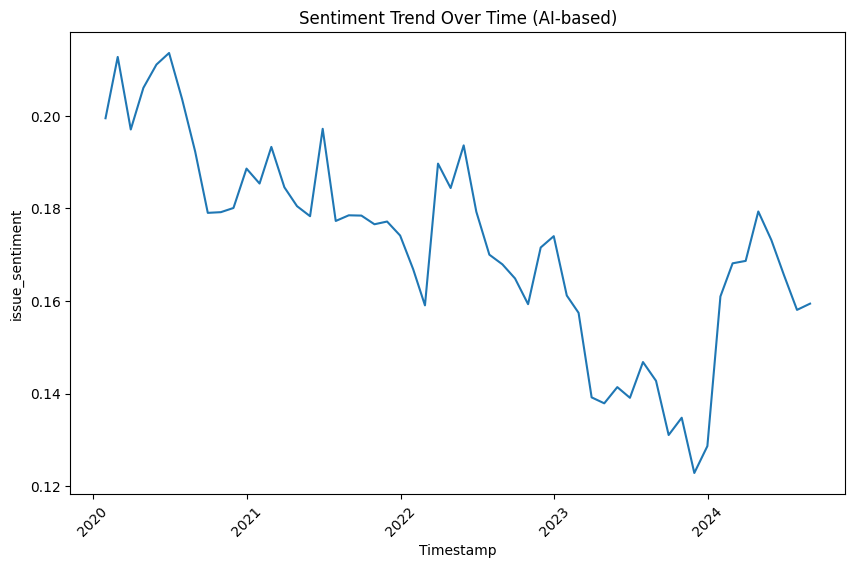

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Timestamp to datetime if not already done
combined_df['Timestamp'] = pd.to_datetime(combined_df['Timestamp'])

# Define the function for time series analysis and plotting
def plot_sentiment_trend(category):
    # Filter the dataframe for the specific category (Traditional or AI-based)
    df_category = combined_df[combined_df['category'] == category]
    
    # Resample by month ('M') and calculate the mean sentiment
    time_series_analysis = df_category.resample('M', on='Timestamp')['issue_sentiment'].mean().reset_index()
    
    # Plot the sentiment trend
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=time_series_analysis, x='Timestamp', y='issue_sentiment')
    plt.title(f'Sentiment Trend Over Time ({category})')
    plt.xticks(rotation=45)
    plt.show()

# Plot sentiment trends for both 'Traditional' and 'AI-based'
plot_sentiment_trend('Traditional')
plot_sentiment_trend('AI-based')


In [48]:
# Filter out rows where 'issue_emotion' is 'neutral'
angular_clean_df_trim = angular_clean_df[angular_clean_df['issue_emotion'] != 'neutral']
bootstrap_clean_df_trim = bootstrap_clean_df[bootstrap_clean_df['issue_emotion'] != 'neutral']
facebook_react_clean_df_trim = facebook_react_clean_df[facebook_react_clean_df['issue_emotion'] != 'neutral']
nodejs_clean_df_trim = nodejs_clean_df[nodejs_clean_df['issue_emotion'] != 'neutral']

In [49]:
# Filter out rows where 'issue_emotion' is 'neutral'
pytorch_clean_df_trim = pytorch_clean_df[pytorch_clean_df['issue_emotion'] != 'neutral']
keras_clean_df_trim = keras_clean_df[keras_clean_df['issue_emotion'] != 'neutral']
tensorflow_clean_df_trim = tensorflow_clean_df[tensorflow_clean_df['issue_emotion'] != 'neutral']
scikit_learn_clean_df_trim = scikit_learn_clean_df[scikit_learn_clean_df['issue_emotion'] != 'neutral']

In [50]:
# Merge all traditional and AI-based datasets
traditional_clean_df_trim = pd.concat([angular_clean_df_trim, bootstrap_clean_df_trim, facebook_react_clean_df_trim, nodejs_clean_df_trim], axis=0)
ai_based_clean_df_trim = pd.concat([pytorch_clean_df_trim, keras_clean_df_trim, tensorflow_clean_df_trim, scikit_learn_clean_df_trim], axis=0)

In [51]:
# Combine both into a single dataframe
combined_clean_df_trim = pd.concat([traditional_clean_df_trim, ai_based_clean_df_trim], axis=0)

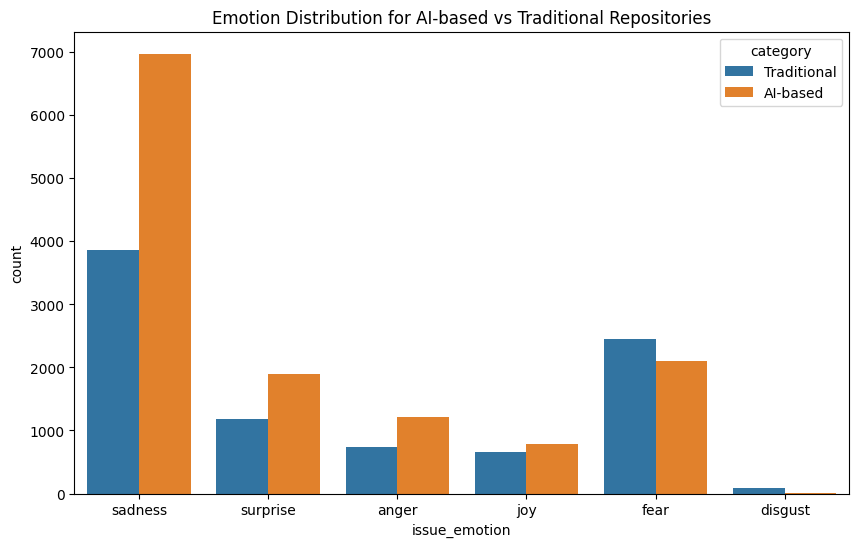

In [52]:
# Plot emotion distribution for AI-based vs Traditional repositories
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_clean_df_trim, x='issue_emotion', hue='category')
plt.title('Emotion Distribution for AI-based vs Traditional Repositories')
plt.show()

In [53]:
combined_df.columns

Index(['Case ID', 'Activity', 'Timestamp', 'Resource', 'issue_sentiment',
       'issue_emotion', 'issue_user_type', 'pr_user_type', 'issue_labels',
       'time_to_close', 'category'],
      dtype='object')